#GWP 2

## Linear Discriminant Analysis

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#import data
data_df = yf.download(["AAPL","AMZN","CSCO","GOOGL","IBM","MSFT","NVDA"],
                      start="2010-01-01", end="2021-12-31")["Adj Close"]

data_df.head()

[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2010-01-04 00:00:00+00:00,6.454505,6.6950,16.601284,15.645692,75.353798,23.347315,0.423952
2010-01-05 00:00:00+00:00,6.465665,6.7345,16.527323,15.576794,74.443512,23.354868,0.430143
2010-01-06 00:00:00+00:00,6.362821,6.6125,16.419739,15.184124,73.959923,23.211533,0.432894
2010-01-07 00:00:00+00:00,6.351058,6.5000,16.493696,14.830644,73.703903,22.970142,0.424410
2010-01-08 00:00:00+00:00,6.393283,6.6760,16.581108,15.028353,74.443512,23.128548,0.425328


In [3]:
# Adjust date
data_df["Date"] = pd.to_datetime(data_df.index)
data_df["Date"] = data_df["Date"].dt.date
data_df.set_index("Date",inplace=True)
data_df.head(3)

Ticker,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2010-01-04,6.454505,6.6950,16.601284,15.645692,75.353798,23.347315,0.423952
2010-01-05,6.465665,6.7345,16.527323,15.576794,74.443512,23.354868,0.430143
2010-01-06,6.362821,6.6125,16.419739,15.184124,73.959923,23.211533,0.432894


In [4]:
# calculate returns
returns_df = data_df.pct_change().dropna()
returns_df.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Date,,,,,,,
2010-01-05,0.001729,0.005900,-0.004455,-0.004404,-0.012080,0.000324,0.014603
2010-01-06,-0.015906,-0.018116,-0.006509,-0.025209,-0.006496,-0.006137,0.006396
2010-01-07,-0.001849,-0.017013,0.004504,-0.023280,-0.003462,-0.010400,-0.019597
2010-01-08,0.006648,0.027077,0.005300,0.013331,0.010035,0.006896,0.002161
2010-01-11,-0.008822,-0.024041,-0.002838,-0.001512,-0.010470,-0.012720,-0.014016


In [5]:
# covariance matrix
cov = np.cov(returns_df, rowvar=False)
cov = pd.DataFrame(cov, index=returns_df.columns, columns=returns_df.columns)
cov

Ticker,AAPL,AMZN,CSCO,GOOGL,IBM,MSFT,NVDA
Ticker,,,,,,,
AAPL,0.000312,0.000158,0.000136,0.000152,0.000102,0.000157,0.000222
AMZN,0.000158,0.000386,0.000125,0.000184,0.000092,0.000165,0.000223
CSCO,0.000136,0.000125,0.000279,0.000124,0.000123,0.000147,0.000197
GOOGL,0.000152,0.000184,0.000124,0.000265,0.000100,0.000158,0.000207
IBM,0.000102,0.000092,0.000123,0.000100,0.000199,0.000110,0.000137
MSFT,0.000157,0.000165,0.000147,0.000158,0.000110,0.000249,0.000227
NVDA,0.000222,0.000223,0.000197,0.000207,0.000137,0.000227,0.000722


In [6]:
# Create a new column called Target that defines strategy to take long position for anticipated returns of 2.0%
# Let 1 depict returns of NVDA exceeding 2.0% and 0 otherwise
returns_df["Target"] = np.where(
    (returns_df["NVDA"].abs() > 0.02), 1, 0)

In [7]:
# Checking target proportion
round(returns_df["Target"].sum() / len(returns_df), 4)

0.3292

In [8]:
# define target variable (NVDA) as y and features (independent variables) as X
X, y = returns_df.iloc[:, 0:-2], returns_df.iloc[:, -1]
print(X.shape, y.shape)

(3019, 6) (3019,)


In [9]:
# split data into train and test sets using 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * 0.2), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2416, 6) (603, 6) (2416,) (603,)


In [10]:
# conduct LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [11]:
# make predictions on test data
y_pred = lda.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
#check model accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [13]:
# print the accuracy and confusion matrix
print(f"Accuracy : {accuracy:.4f}")
print(conf_matrix)
print(class_report)

Accuracy : 0.5837
[[351   0]
 [251   1]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       351
           1       1.00      0.00      0.01       252

    accuracy                           0.58       603
   macro avg       0.79      0.50      0.37       603
weighted avg       0.76      0.58      0.43       603



## SVM (Support Vector machine)

### For our implementation we are going to do a simple BTC Price Movement Classification using SVM to predict whether a cryptocurrency's price (e.g., Bitcoin) will move up(1) or down(0) based on historical price data and technical indicators.

Installing necessary data sources and computations api's

In [14]:
!pip install yfinance
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=9dcd3df85877dd3a68d160df51fa8aa1246b5f881978f084563a3e3ece18e2e4
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


importing necessary libraries for computations

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
import pandas_ta as ta
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


Downloading 5 years of daily OHLCV data og BTC-USD from yahoo finance Api

In [16]:
# Gathering BTC data

Start = '2019-01-01'
End = '2024-01-01'
df = yf.download('BTC-USD', start=Start, end=End).dropna()

[*********************100%***********************]  1 of 1 completed


In [17]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


calculating all the important tecnical indicators to our data frame like Returns, SMA, RSI, MACD as part of our Feature engineering.

In [18]:
df['Returns'] = df['Adj Close'].pct_change()
df['10_SMA'] = df['Close'].rolling(window=10).mean()
df['50_SMA'] = df['Close'].rolling(window=50).mean()
df['RSI'] = ta.rsi(df['Close'])
macd_df = df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df['MACD'] = macd_df['MACD_12_26_9']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

Making a data of complete dataframe for further analysis

In [19]:
df_main = df.copy()

In [20]:
df_main

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line
Date,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553


Building a strategy to calculate up and down of BTC using the main dataframe, it will help use to create our traget variable.



*   if bulish condition is met then target value will be 1(up)
*   and if not then the target value will be 0(down)



In [21]:
df_main['Next_Day_Close'] = df_main['Close'].shift(-1)
df_main['Bullish_Condition'] = ((df_main['10_SMA'] > df_main['50_SMA']) &
                             (df_main['RSI'] < 70) &
                             (df_main['MACD'] > df_main['Signal_Line'])).astype(int)


df_main['Target'] = np.where((df_main['Next_Day_Close'] > df_main['Close']) & (df_main['Bullish_Condition'] == 1), 1, 0)


Checking the total value counts of ups and downs using target variable.

,count
Target,
0,1684
1,142


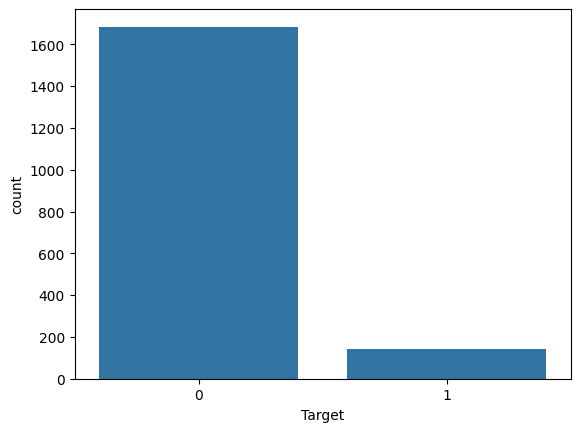

In [22]:
sns.countplot(x = "Target", data = df_main)
df_main.loc[:,"Target"].value_counts()

In [23]:
df_main.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       '10_SMA', '50_SMA', 'RSI', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'MACD', 'Signal_Line', 'Next_Day_Close',
       'Bullish_Condition', 'Target'],
      dtype='object')

we have also visualized the target varible of ups and down and we can see the how scatterd are they our goal is to classify them using SVM.


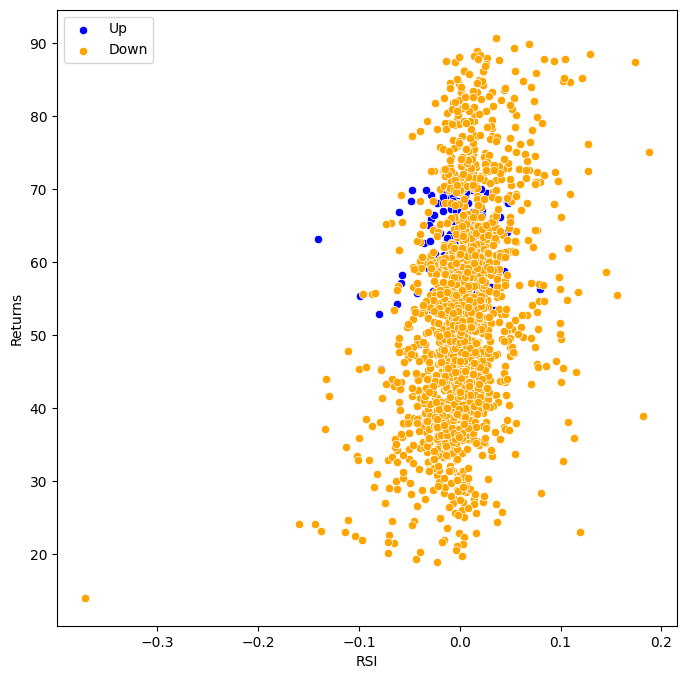

In [24]:
# Second Visual
Up = df_main[df_main.Target == 1]
Down = df_main[df_main.Target == 0]

plt.figure(figsize = (8,8))
plt.scatter(Up.Returns, Up.RSI, color = "blue", label = "Up", linewidths=0.5 ,edgecolors="white")
plt.scatter(Down.Returns, Down.RSI, color = "orange", label = "Down", linewidths=0.5, edgecolors="white")
plt.xlabel("RSI")
plt.ylabel("Returns")
plt.legend()
plt.show()

here we have made the final copy of our preprocessed data for running the learning algorithm.

In [25]:
df_svm = df_main.copy()

In [26]:
df_svm

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition,Target
Date,,,,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3943.409424,0,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3836.741211,0,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857.717529,0,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3845.194580,0,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4076.632568,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728,42627.855469,0,0
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483,42099.402344,0,0
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553,42156.902344,0,0


Here we have divided our data in two forms where in x_data we drop our target variable and in y_data we will only include Target values i.e. 0's and 1's.


In [27]:
# x_data
x_data = df_svm.drop(["Target"], axis = 1)

#y_data
y_data = df_svm.Target.values

In [28]:
x_data

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition
Date,,,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3943.409424,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3836.741211,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857.717529,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3845.194580,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4076.632568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728,42627.855469,0
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483,42099.402344,0
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553,42156.902344,0


In [29]:
y_data


array([0, 0, 0, ..., 0, 0, 0])

before furthur analysis we have to normalize the data for that we are using MinMax Scaler to tranform our data, but we can also see there were some missing data due to our feature engineering we are going to take care of that here using interpolation technique we have used a linear interpolation method to fill the missing data.

In [30]:
scaler = MinMaxScaler()


x_data = scaler.fit_transform(x_data)

original_columns = df_svm.drop(["Target"], axis=1).columns


x_data = pd.DataFrame(x_data, columns=original_columns).interpolate(method='linear', limit_direction='both', axis=0)

x_data

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition
0,0.005383,0.006471,0.005020,0.006920,0.006920,0.000000,0.711217,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.008477,0.0
1,0.006981,0.007956,0.006769,0.008477,0.008477,0.002656,0.711217,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.006815,0.0
2,0.008257,0.007768,0.006909,0.006815,0.006815,0.000594,0.616363,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.007141,0.0
3,0.006714,0.006701,0.006236,0.007141,0.007141,0.001511,0.674516,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.006946,0.0
4,0.007024,0.007297,0.007078,0.006946,0.006946,0.002347,0.658933,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.010553,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0.609791,0.615884,0.615588,0.624046,0.624046,0.060398,0.703537,0.650150,0.636627,0.567372,0.580888,0.499658,0.623064,0.580888,0.623064,0.611345,0.0
1822,0.624596,0.617745,0.617985,0.611345,0.611345,0.053853,0.631188,0.650157,0.639068,0.507460,0.570852,0.485064,0.616381,0.570852,0.616381,0.603109,0.0
1823,0.611290,0.607334,0.603785,0.603109,0.603109,0.062531,0.642568,0.649877,0.640960,0.470993,0.557979,0.465571,0.608066,0.557979,0.608066,0.604005,0.0
1824,0.603139,0.599069,0.605883,0.604005,0.604005,0.033723,0.667181,0.647435,0.642656,0.474988,0.547555,0.456722,0.599010,0.547555,0.599010,0.605693,0.0


Now. we have splitted our data in 80:20 ratio for training and testing

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

we are using sckit learn SVM library to run our learning algorithm, first we will run a random SVM model to check it's accuracy.

Our random model resulted with an accuracy of 0.9371584699453552, but we want to improve it so will further explore techniques.

In [32]:
Model_1 = svm.SVC(random_state = 1)

Model_1.fit(x_train, y_train)

print("accuracy of Model_1 algo:", Model_1.score(x_test, y_test))

accuracy of Model_1 algo: 0.9371584699453552


For selecting a better model we are going to run a grid Search algorithm will will give do all the hyperparameter tuning on our behalf for the provided techniques i.e. Kernel method (Linear, Polynomial, Sigmoid) and provide us the best estimator for our model.


In [33]:
grid={"C":[1, 100, 1000],
      "kernel":["linear","poly","sigmoid"],
      'gamma': ['scale', 'auto'],
      'degree': [2, 3]
}

model_selection = svm.SVC(random_state = 1)

model_selection.fit(x_train, y_train)

print("test accuracy {}".format(model_selection.score(x_test,y_test)))
print("Train accuracy {}".format(model_selection.score(x_train, y_train)))

model_selection_gscv=GridSearchCV(model_selection,grid,cv=10)
model_selection_gscv.fit(x_test,y_test)

test accuracy 0.9371584699453552
Train accuracy 0.9363013698630137


GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [1, 100, 1000], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']})

After running the grid search CV we can the best estimator which should be used to improve the accuracy of the model.

In [34]:
print("best hyperparameters: ", model_selection_gscv.best_params_)
print("accuracy: ", model_selection_gscv.best_score_)

best hyperparameters:  {'C': 1000, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
accuracy:  0.9617117117117117


we can see {'C': 1000, 'kernel': 'poly'} is the best hyperparameter that the grid search cv have found so we are going to use these hyperparameter in our model and check if the accuracy improves or not.

In [35]:
main_model = svm.SVC(C = 1000, kernel="poly", degree= 2)

print("test accuracy: {} ".format(main_model.fit(x_test, y_test).score(x_test, y_test)))
print("train accuracy: {} ".format(main_model.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.9918032786885246 
train accuracy: 0.9910958904109589 


here we can see in the results above test accuracy: 0.9972677595628415, train accuracy: 0.9965753424657534, how model accuray have improved a lot but also our training accuracy is also impressive.

Now we have to vislaize our data with final results but we have problem as our model arounf 17 features which will be very tricky to visualize so for that will have to improvise and call our good old friend PCA (we have already discussed about it briefly in GWP1), we will use PCA to reduce the dimesion of our model for plotting purposes. Then, we can plot the decision boundary and visualize how the SVM classifier separates the data. Although our accuracy reduced but still this is just for visuaization.

In [36]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(x_train)
X_test_reduced = pca.transform(x_test)

# Train the SVM model on reduced data
main_model.fit(X_train_reduced, y_train)
print("test accuracy: {} ".format(main_model.fit(X_test_reduced, y_test).score(X_test_reduced, y_test)))
print("train accuracy: {} ".format(main_model.fit(X_train_reduced, y_train).score(X_train_reduced, y_train)))

test accuracy: 0.953551912568306 
train accuracy: 0.9273972602739726 


Here we have again trained the same SVM model with same hyperparameters but with reduced data and plotted it to visulaize our decision boundary.

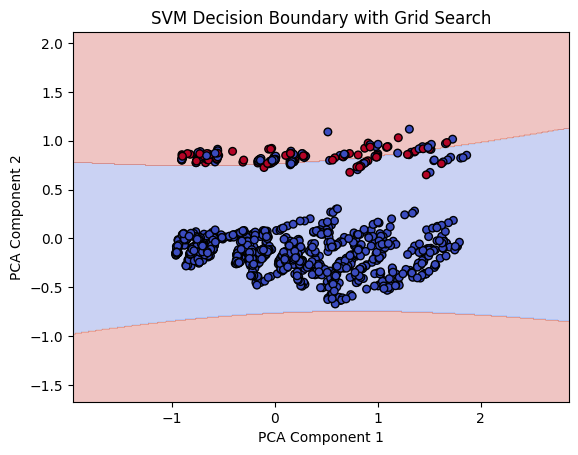

In [37]:
# Function to plot decision boundary
def plot_svm_decision_boundary(model, X, y):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the margins
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary with Grid Search")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Plot the decision boundary using training data
plot_svm_decision_boundary(main_model, X_train_reduced, y_train)

## Neural Networks

### For our implementation we are going to do a simple BTC Price Movement modeling using Neural Networks to predict whether a cryptocurrency's price (e.g., Bitcoin) will move up(1) or down(0) based on historical price data and technical indicators.

Installing necessary data sources and computations api's

In [38]:
!pip install yfinance
!pip install pandas_ta
!pip install scikeras

importing necessary libraries for computations

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
import pandas_ta as ta
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Downloading 5 years of daily OHLCV data og BTC-USD from yahoo finance Api

In [40]:
# Gathering BTC data

Start = '2019-01-01'
End = '2024-01-01'
df = yf.download('BTC-USD', start=Start, end=End).dropna()

[*********************100%***********************]  1 of 1 completed


In [41]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


calculating all the important tecnical indicators to our data frame like Returns, SMA, RSI, MACD as part of our Feature engineering.

In [42]:
df['Returns'] = df['Adj Close'].pct_change()
df['10_SMA'] = df['Close'].rolling(window=10).mean()
df['50_SMA'] = df['Close'].rolling(window=50).mean()
df['RSI'] = ta.rsi(df['Close'])
macd_df = df.ta.macd(close='Close', fast=12, slow=26, signal=9, append=True)
df['MACD'] = macd_df['MACD_12_26_9']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

Making a data of complete dataframe for further analysis

In [43]:
df_main = df.copy()

In [44]:
df_main

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line
Date,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553


Building a strategy to calculate up and down of BTC using the main dataframe, it will help use to create our traget variable.



*   if bulish condition is met then target value will be 1(up)
*   and if not then the target value will be 0(down)



In [45]:
df_main['Next_Day_Close'] = df_main['Close'].shift(-1)
df_main['Bullish_Condition'] = ((df_main['10_SMA'] > df_main['50_SMA']) &
                             (df_main['RSI'] < 70) &
                             (df_main['MACD'] > df_main['Signal_Line'])).astype(int)


df_main['Target'] = np.where((df_main['Next_Day_Close'] > df_main['Close']) & (df_main['Bullish_Condition'] == 1), 1, 0)


Checking the total value counts of ups and downs using target variable.

,count
Target,
0,1684
1,142


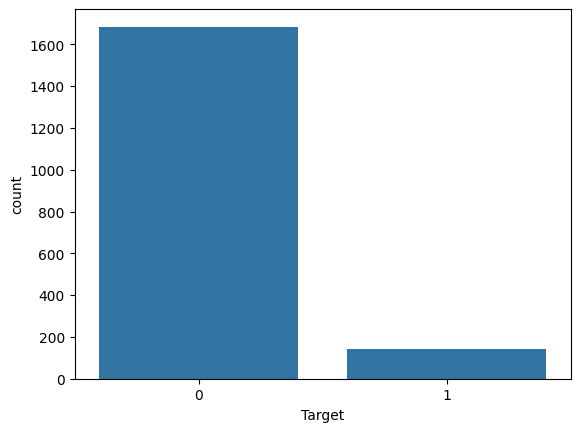

In [46]:
sns.countplot(x = "Target", data = df_main)
df_main.loc[:,"Target"].value_counts()

In [47]:
df_main.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Returns',
       '10_SMA', '50_SMA', 'RSI', 'MACD_12_26_9', 'MACDh_12_26_9',
       'MACDs_12_26_9', 'MACD', 'Signal_Line', 'Next_Day_Close',
       'Bullish_Condition', 'Target'],
      dtype='object')

we have also visualized the target varible of ups and down and we can see the how scatterd are they our goal is to model them using NN.


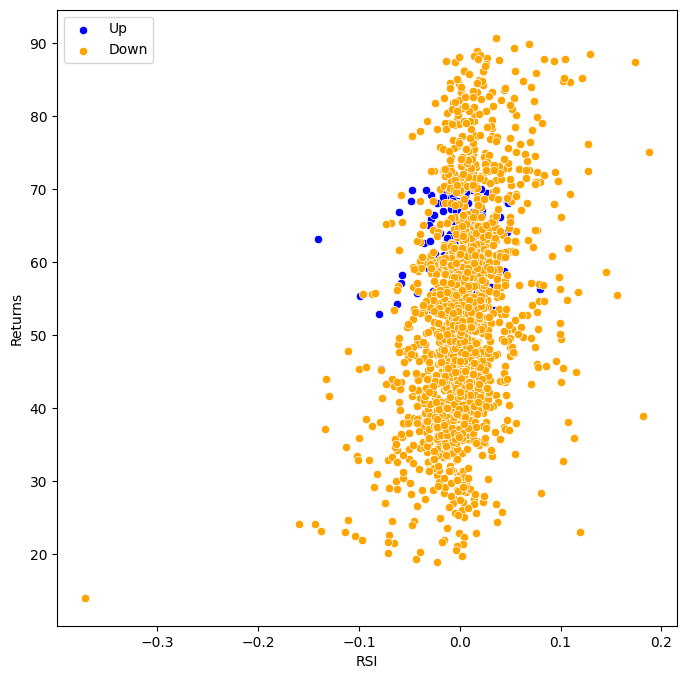

In [48]:
# Second Visual
Up = df_main[df_main.Target == 1]
Down = df_main[df_main.Target == 0]

plt.figure(figsize = (8,8))
plt.scatter(Up.Returns, Up.RSI, color = "blue", label = "Up", linewidths=0.5 ,edgecolors="white")
plt.scatter(Down.Returns, Down.RSI, color = "orange", label = "Down", linewidths=0.5, edgecolors="white")
plt.xlabel("RSI")
plt.ylabel("Returns")
plt.legend()
plt.show()

here we have made the final copy of our preprocessed data for running the learning algorithm.

In [49]:
df_nn = df_main.copy()

In [50]:
df_nn

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition,Target
Date,,,,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3943.409424,0,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3836.741211,0,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857.717529,0,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3845.194580,0,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4076.632568,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728,42627.855469,0,0
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483,42099.402344,0,0
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553,42156.902344,0,0


Here we have divided our data in two forms where in x_data we drop our target variable and in y_data we will only include Target values i.e. 0's and 1's.


In [51]:
# x_data
x_data = df_nn.drop(["Target"], axis = 1)

#y_data
y_data = df_nn.Target.values

In [52]:
x_data

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition
Date,,,,,,,,,,,,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3943.409424,0
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836,0.025989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3836.741211,0
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219,-0.027050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3857.717529,0
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467,0.005467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3845.194580,0
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824,-0.003246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4076.632568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,43274.542969,40039.379844,57.563288,945.599611,-195.627117,1141.226728,945.599611,1141.226728,42627.855469,0
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,43274.974609,40178.831406,52.971739,841.965503,-239.408980,1081.374483,841.965503,1081.374483,42099.402344,0
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,43257.862109,40286.956953,50.176936,709.019835,-297.883718,1006.903553,709.019835,1006.903553,42156.902344,0


In [53]:
y_data


array([0, 0, 0, ..., 0, 0, 0])

before furthur analysis we have to normalize the data for that we are using MinMax Scaler to tranform our data, but we can also see there were some missing data due to our feature engineering we are going to take care of that here using interpolation technique we have used a linear interpolation method to fill the missing data.

In [54]:
scaler = MinMaxScaler()


x_data = scaler.fit_transform(x_data)

original_columns = df_nn.drop(["Target"], axis=1).columns


x_data = pd.DataFrame(x_data, columns=original_columns).interpolate(method='linear', limit_direction='both', axis=0)

x_data

,Open,High,Low,Close,Adj Close,Volume,Returns,10_SMA,50_SMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD,Signal_Line,Next_Day_Close,Bullish_Condition
0,0.005383,0.006471,0.005020,0.006920,0.006920,0.000000,0.711217,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.008477,0.0
1,0.006981,0.007956,0.006769,0.008477,0.008477,0.002656,0.711217,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.006815,0.0
2,0.008257,0.007768,0.006909,0.006815,0.006815,0.000594,0.616363,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.007141,0.0
3,0.006714,0.006701,0.006236,0.007141,0.007141,0.001511,0.674516,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.006946,0.0
4,0.007024,0.007297,0.007078,0.006946,0.006946,0.002347,0.658933,0.007462,0.000049,0.317768,0.479357,0.566829,0.483933,0.479357,0.484149,0.010553,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0.609791,0.615884,0.615588,0.624046,0.624046,0.060398,0.703537,0.650150,0.636627,0.567372,0.580888,0.499658,0.623064,0.580888,0.623064,0.611345,0.0
1822,0.624596,0.617745,0.617985,0.611345,0.611345,0.053853,0.631188,0.650157,0.639068,0.507460,0.570852,0.485064,0.616381,0.570852,0.616381,0.603109,0.0
1823,0.611290,0.607334,0.603785,0.603109,0.603109,0.062531,0.642568,0.649877,0.640960,0.470993,0.557979,0.465571,0.608066,0.557979,0.608066,0.604005,0.0
1824,0.603139,0.599069,0.605883,0.604005,0.604005,0.033723,0.667181,0.647435,0.642656,0.474988,0.547555,0.456722,0.599010,0.547555,0.599010,0.605693,0.0


Now. we have splitted our data in 80:20 ratio for training and testing

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state = 1)

we are using Keras library to run our learning algorithm

In [56]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),                                   # Hidden layer
    layers.Dense(1, activation='sigmoid')                                  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy using Random Model: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4514 - loss: 0.6983 - val_accuracy: 0.9315 - val_loss: 0.3881
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9157 - loss: 0.3624 - val_accuracy: 0.9315 - val_loss: 0.2339
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2642 - val_accuracy: 0.9315 - val_loss: 0.1853
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9089 - loss: 0.2197 - val_accuracy: 0.9315 - val_loss: 0.1528
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.1674 - val_accuracy: 0.9281 - val_loss: 0.1208
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9199 - loss: 0.1391 - val_accuracy: 0.9281 - val_loss: 0.1074
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.1345 - val_accuracy: 0.9281 - val_loss: 0.1007
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9178 - loss: 0.1207 - val_accuracy: 0.9315 - val_loss:

For selecting a better model we are going to run a grid Search algorithm and will give do all the hyperparameter tuning on our behalf for the provided techniques


In [57]:
def create_and_train_model(neurons, optimizer, batch_size, epochs):
    # Define the model
    model = keras.Sequential([
        layers.Dense(neurons, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
        layers.Dense(32, activation='relu'),                                       # Hidden layer
        layers.Dense(1, activation='sigmoid')                                      # Output layer
    ])

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Fit the model
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return model, history


In [58]:
# Define hyperparameters to tune
neurons_list = [16, 32, 64]
optimizers = ['adam', 'sgd']
batch_sizes = [16, 32]
epochs = 50

results = []

# Loop through hyperparameter combinations
for neurons in neurons_list:
    for optimizer in optimizers:
        for batch_size in batch_sizes:
            # Train the model with current hyperparameters
            model, history = create_and_train_model(neurons, optimizer, batch_size, epochs)

            # Evaluate the model
            test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

            # Store the results
            results.append({
                'neurons': neurons,
                'optimizer': optimizer,
                'batch_size': batch_size,
                'test_accuracy': test_accuracy
            })

            print(f'Neurons: {neurons}, Optimizer: {optimizer}, Batch Size: {batch_size}, Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 16, Optimizer: adam, Batch Size: 16, Test Accuracy: 0.9344262480735779


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 16, Optimizer: adam, Batch Size: 32, Test Accuracy: 0.931693971157074


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 16, Optimizer: sgd, Batch Size: 16, Test Accuracy: 0.9344262480735779


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 16, Optimizer: sgd, Batch Size: 32, Test Accuracy: 0.9289617538452148


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 32, Optimizer: adam, Batch Size: 16, Test Accuracy: 0.937158465385437


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 32, Optimizer: adam, Batch Size: 32, Test Accuracy: 0.9398906826972961


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 32, Optimizer: sgd, Batch Size: 16, Test Accuracy: 0.931693971157074


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 32, Optimizer: sgd, Batch Size: 32, Test Accuracy: 0.9344262480735779


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 64, Optimizer: adam, Batch Size: 16, Test Accuracy: 0.9426229596138


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 64, Optimizer: adam, Batch Size: 32, Test Accuracy: 0.9344262480735779


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 64, Optimizer: sgd, Batch Size: 16, Test Accuracy: 0.937158465385437


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons: 64, Optimizer: sgd, Batch Size: 32, Test Accuracy: 0.937158465385437


In [59]:
# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Find the best configuration
best_result = results_df.loc[results_df['test_accuracy'].idxmax()]

print("\nBest Hyperparameters:")
print(best_result)



Best Hyperparameters:
neurons                64
optimizer            adam
batch_size             16
test_accuracy    0.942623
Name: 8, dtype: object


we can see {'neurons': 32, 'optimizer': 'adam', 'batch_size':16} is the best hyperparameter that the grid search cv have found so we are going to use these hyperparameter in our model and check if the accuracy improves or not.

In [60]:
model, history = create_and_train_model(32, 'adam', 16, 50)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("test accuracy: {} ".format(test_accuracy))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


test accuracy: 0.9398906826972961 


here we can see in the results above test accuracy: 0.94, model accuracy have improved a lot

In [61]:
%%shell
jupyter nbconvert --to html /content/Group_7073_ML_GWP__2.ipynb

[NbConvertApp] Converting notebook /content/Group_7073_ML_GWP__2.ipynb to html
[NbConvertApp] Writing 1268010 bytes to /content/Group_7073_ML_GWP__2.html
